<a href="https://colab.research.google.com/github/madz23/keras_mnistdigits/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Neural Networks Homework 2
Leslie Kerby

# **MNIST Digits and Keras continued**</br>
Import in the MNIST digits dataset (70,000 images, each 28x28 pixels). Preprocess the data as necessary. The training set should have 60k images and the test set 10k. Also create a validation set within the training set -- using 10% of the training data. 

**Part 1** </br>
Create a deep and wide neural network using the Keras Functional API (exact architecture left up to you). Train it for an appropriate number of epochs with an appropriate learning rate and plot the accuracy/loss vs epoch. Find the accuracy on the test data and plot the first five misclassified images. 

**Part 2**</br>
Use the subclassing API to create a different multi-path network than Part 1 (ie, a deep and wide network is multi-path) with two different inputs. Send all pixels in one input and a subset of pixels in the second input. Experiment with different architectures. Train it for an appropriate number of epochs with an appropriate learning rate and plot the accuracy/loss vs epoch. Find the accuracy on the test data and plot the first five misclassified images.

**Part 3**</br>
Which NN was the best? What was its accuracy? It's confusion matrix? Discuss. 

# Preprocess the data

In [88]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from collections import Counter
from sklearn.metrics import confusion_matrix
import seaborn as sns

import numpy as np

import pandas as pd


In [89]:
# Pull the data set

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255


In [90]:
# Create validation dataset
x_train_t, x_train_v, y_train_t, y_train_v = train_test_split(x_train, y_train, test_size = 7000)

# Part 1

In [91]:
inputs = keras.Input(shape = (784,))

# For later display
img_inputs = keras.Input(shape=(32, 32, 3))


In [92]:
hidden1 = layers.Dense(64, activation="relu", name = "hidden1")(inputs)
hidden2 = layers.Dense(64, activation="relu", name = "hidden2")(hidden1)
concat = keras.layers.Concatenate()([inputs, hidden2])

In [93]:
outputs = layers.Dense(10, name = 'output')(concat)

In [94]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [95]:
model.summary()

Model: "mnist_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 hidden1 (Dense)                (None, 64)           50240       ['input_5[0][0]']                
                                                                                                  
 hidden2 (Dense)                (None, 64)           4160        ['hidden1[0][0]']                
                                                                                                  
 concatenate_10 (Concatenate)   (None, 848)          0           ['input_5[0][0]',                
                                                                  'hidden2[0][0]']      

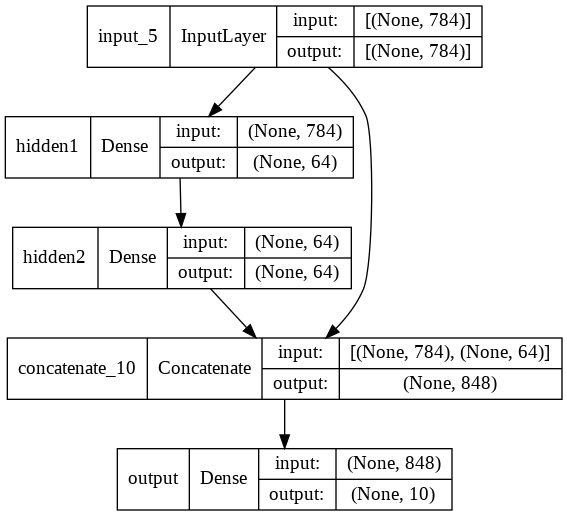

In [96]:
keras.utils.plot_model(model, show_shapes=True)

In [97]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)
# https://www.tensorflow.org/guide/keras/functional

In [98]:
history = model.fit(x_train, y_train, batch_size=64, epochs=13, validation_data = (x_train_v, y_train_v))

Epoch 1/13
938/938 [==============================] - 5s 4ms/step - loss: 0.3343 - accuracy: 0.9060 - val_loss: 0.1826 - val_accuracy: 0.9451
Epoch 2/13
938/938 [==============================] - 4s 4ms/step - loss: 0.1562 - accuracy: 0.9547 - val_loss: 0.1203 - val_accuracy: 0.9636
Epoch 3/13
938/938 [==============================] - 4s 4ms/step - loss: 0.1122 - accuracy: 0.9673 - val_loss: 0.1214 - val_accuracy: 0.9604
Epoch 4/13
938/938 [==============================] - 4s 4ms/step - loss: 0.0907 - accuracy: 0.9734 - val_loss: 0.0710 - val_accuracy: 0.9771
Epoch 5/13
938/938 [==============================] - 4s 4ms/step - loss: 0.0757 - accuracy: 0.9773 - val_loss: 0.0600 - val_accuracy: 0.9827
Epoch 6/13
938/938 [==============================] - 4s 4ms/step - loss: 0.0650 - accuracy: 0.9804 - val_loss: 0.0671 - val_accuracy: 0.9791
Epoch 7/13
938/938 [==============================] - 4s 4ms/step - loss: 0.0568 - accuracy: 0.9832 - val_loss: 0.0400 - val_accuracy: 0.9876
Epoch 

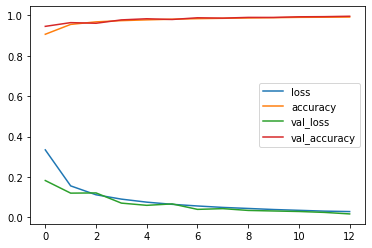

In [99]:
# Check for overfitness
pd.DataFrame(history.history).plot()

In [100]:
# Try a different learning rate
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.SGD(learning_rate = 0.004),
    metrics=["accuracy"],
)

In [101]:
history = model.fit(x_train, y_train, batch_size=64, epochs=15, validation_data = (x_train_v, y_train_v))

Epoch 1/15
938/938 [==============================] - 4s 4ms/step - loss: 0.0153 - accuracy: 0.9959 - val_loss: 0.0129 - val_accuracy: 0.9974
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0134 - accuracy: 0.9967 - val_loss: 0.0119 - val_accuracy: 0.9976
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0125 - accuracy: 0.9970 - val_loss: 0.0116 - val_accuracy: 0.9977
Epoch 4/15
938/938 [==============================] - 4s 4ms/step - loss: 0.0120 - accuracy: 0.9972 - val_loss: 0.0109 - val_accuracy: 0.9981
Epoch 5/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0116 - accuracy: 0.9974 - val_loss: 0.0106 - val_accuracy: 0.9981
Epoch 6/15
938/938 [==============================] - 4s 4ms/step - loss: 0.0113 - accuracy: 0.9975 - val_loss: 0.0103 - val_accuracy: 0.9983
Epoch 7/15
938/938 [==============================] - 4s 4ms/step - loss: 0.0111 - accuracy: 0.9975 - val_loss: 0.0102 - val_accuracy: 0.9983
Epoch 

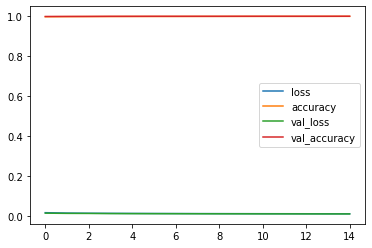

In [102]:
# Check for overfitness
pd.DataFrame(history.history).plot()

In [103]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0925 - accuracy: 0.9782


[0.092465341091156, 0.9782000184059143]

In [104]:
predictions = np.argmax(model.predict(x_test), axis = 1)
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [105]:
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

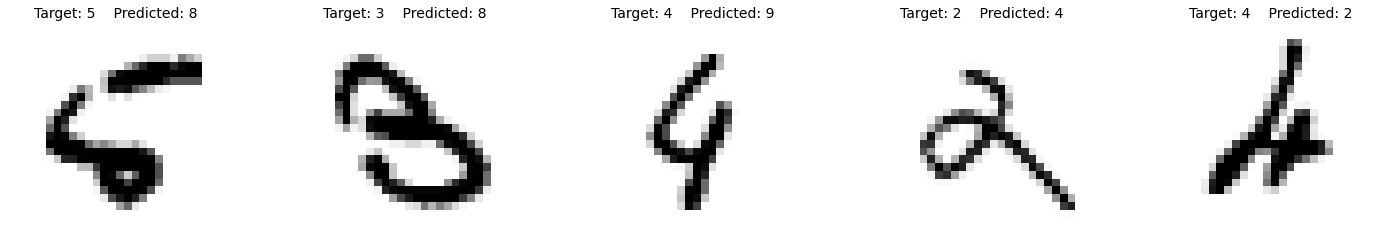

In [106]:
# Some misclassified images
misclassified = []
index = 0
for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassified.append(index)
  index += 1

# This should be the total number of misclassified images
len(misclassified)

# We will show 7 misclassfied images
plt.figure(figsize=(25,4))
for index in range(5):
  plt.subplot(1, 5, index + 1)
  plt.imshow(x_test[misclassified[index]].reshape(28,28), cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {classes[y_test[misclassified[index]]]}    Predicted: {classes[predictions[misclassified[index]]]}', fontsize=14)

plt.show()

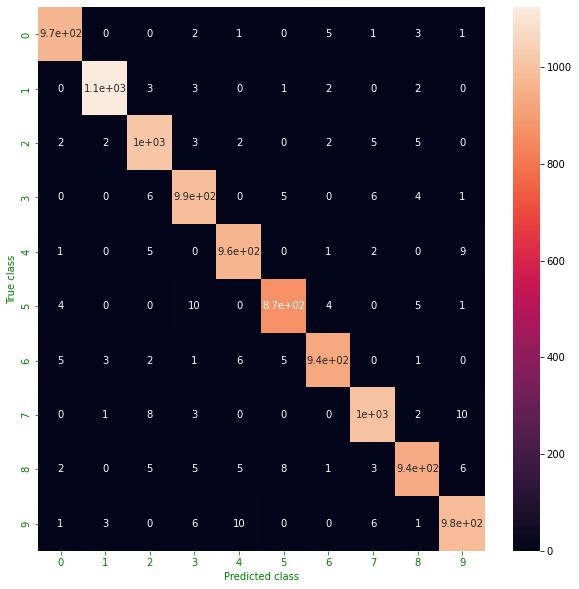

In [107]:
# Confusion Matrix
matrix = confusion_matrix(y_test, np.argmax(model.predict(x_test), axis = -1))
matrix_dataframe = pd.DataFrame(matrix, index = classes, columns = classes)
plt.figure(figsize = (10, 10))
sns.heatmap(matrix_dataframe, annot = True)
plt.ylabel('True class', color = 'green')
plt.xlabel('Predicted class', color = 'green')
plt.tick_params(color = 'green', labelcolor = 'green')
plt.show()

# Part 2

In [108]:
# construct a class for the wide and deep model
class WideDeepModel(keras.models.Model):
  def __init__(self, units=30, activation="relu", **kwargs): 
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)
    self.concat = keras.layers.Concatenate()


  def call(self, inputs):  
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = self.concat([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output
  
model = WideDeepModel() # parameters are optional

In [109]:
model.compile(loss="mse", loss_weights=[0.9, 0.1],
              optimizer=tf.keras.optimizers.SGD(lr=5e-3))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [110]:
history = model.fit( (x_train_t[:,:5], x_train_t[:,2:]), [y_train_t, y_train_t],
                    epochs=12,  
                    validation_data=((x_train_v[:,:5], x_train_v[:,2:]),
                                     [y_train_v, y_train_v]),
)

Epoch 1/12
1657/1657 [==============================] - 5s 2ms/step - loss: 2.5812 - output_1_loss: 2.5188 - output_2_loss: 3.1429 - val_loss: 2.4898 - val_output_1_loss: 2.4970 - val_output_2_loss: 2.4255
Epoch 2/12
1657/1657 [==============================] - 4s 2ms/step - loss: 1.3092 - output_1_loss: 1.2862 - output_2_loss: 1.5166 - val_loss: 1.3006 - val_output_1_loss: 1.2936 - val_output_2_loss: 1.3634
Epoch 3/12
1657/1657 [==============================] - 4s 2ms/step - loss: 1.0262 - output_1_loss: 1.0134 - output_2_loss: 1.1418 - val_loss: 1.3146 - val_output_1_loss: 1.3038 - val_output_2_loss: 1.4118
Epoch 4/12
1657/1657 [==============================] - 4s 2ms/step - loss: 0.9049 - output_1_loss: 0.8947 - output_2_loss: 0.9959 - val_loss: 0.9018 - val_output_1_loss: 0.8935 - val_output_2_loss: 0.9768
Epoch 5/12
1657/1657 [==============================] - 4s 2ms/step - loss: 0.8251 - output_1_loss: 0.8167 - output_2_loss: 0.9012 - val_loss: 0.8252 - val_output_1_loss: 0.817

In [114]:
history = model.fit( (x_train_t[:,:5], x_train_t[:,2:]), [y_train_t, y_train_t],
                    epochs=20,
                    validation_data=((x_train_v[:,:5], x_train_v[:,2:]),
                                     [y_train_v, y_train_v]))

Epoch 1/20
1657/1657 [==============================] - 4s 2ms/step - loss: 0.5562 - output_1_loss: 0.5492 - output_2_loss: 0.6191 - val_loss: 0.7041 - val_output_1_loss: 0.6958 - val_output_2_loss: 0.7789
Epoch 2/20
1657/1657 [==============================] - 4s 2ms/step - loss: 0.5332 - output_1_loss: 0.5263 - output_2_loss: 0.5954 - val_loss: 0.6653 - val_output_1_loss: 0.6573 - val_output_2_loss: 0.7373
Epoch 3/20
1657/1657 [==============================] - 4s 2ms/step - loss: 0.5193 - output_1_loss: 0.5125 - output_2_loss: 0.5808 - val_loss: 0.6858 - val_output_1_loss: 0.6800 - val_output_2_loss: 0.7373
Epoch 4/20
1657/1657 [==============================] - 4s 2ms/step - loss: 0.5026 - output_1_loss: 0.4960 - output_2_loss: 0.5618 - val_loss: 0.6556 - val_output_1_loss: 0.6491 - val_output_2_loss: 0.7144
Epoch 5/20
1657/1657 [==============================] - 4s 2ms/step - loss: 0.4908 - output_1_loss: 0.4842 - output_2_loss: 0.5497 - val_loss: 0.7015 - val_output_1_loss: 0.696

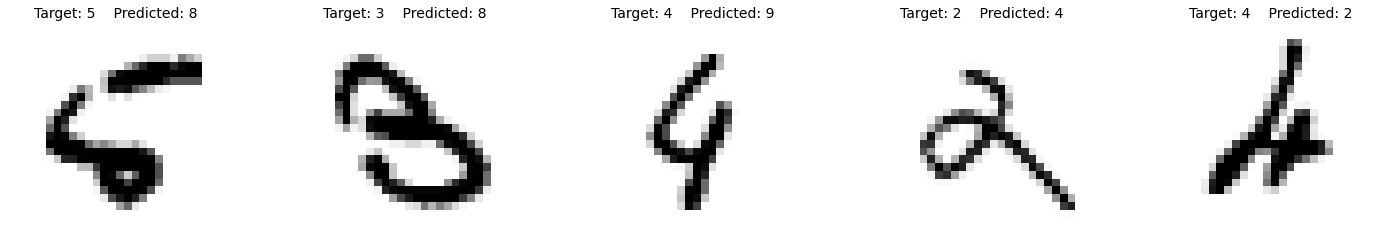

In [115]:
# Some misclassified images
misclassified = []
index = 0
for target, predict in zip(y_test, predictions):
  if target != predict:
    misclassified.append(index)
  index += 1

# This should be the total number of misclassified images
len(misclassified)

# We will show 7 misclassfied images
plt.figure(figsize=(25,4))
for index in range(5):
  plt.subplot(1, 5, index + 1)
  plt.imshow(x_test[misclassified[index]].reshape(28,28), cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {classes[y_test[misclassified[index]]]}    Predicted: {classes[predictions[misclassified[index]]]}', fontsize=14)

plt.show()

# Part 3


I found the Functional API a little easier to work with and was thus able to experiment with it a little more and try to get higher accuracy with it. I think the Subclassing API has interesting implications for customizability. Neither of these models is inherently better than the other, however, my data makes it look like the Functional API look a lot better since I liked it more and spent more time trying to achieve high levels of accuracy. For those reasons, I would probably choose to use a Functional API if I ever do this in the future, but the Subclassing API is still an excellent option.  